In [753]:
import pandas as pd
import numpy as np
import datetime
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [754]:
#Load data from excel file
prod = pd.read_excel('../data/HotelReservations.xlsx',sheet_name='Reservations')

In [755]:
#Print prod type
type(prod)

pandas.core.frame.DataFrame

In [756]:
#Print row x column
prod.shape

(36275, 19)

In [757]:
#Assign pd to df
df = pd.DataFrame(prod)

In [758]:
#Print data type of column
df.info()
pd.DataFrame(prod.dtypes, columns=['DataType'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,DataType
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [759]:
#Find for missing data
prod.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [760]:
#print sample data
prod.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [761]:
#Sort the df by year, month, date
Sort = df.sort_values(by=['arrival_year','arrival_month','arrival_date'])

In [762]:
#Print head, mid & tail to check on first, middle & last record 
start = 1
mid = df.shape[0]//2
mid_end = mid + 1
end = 1
pd.concat([df[:start], df[mid:mid_end], df[-end:]])

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
18137,INN18138,2,0,0,2,Meal Plan 1,0,Room_Type 1,127,2018,12,22,Online,0,0,0,90.00,3,Not_Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [763]:
#Reset the index to unique id
prod.set_index('Booking_ID', inplace=True)

In [764]:
#print index id
print(prod.index.name)

Booking_ID


In [765]:
prod.index

Index(['INN00001', 'INN00002', 'INN00003', 'INN00004', 'INN00005', 'INN00006',
       'INN00007', 'INN00008', 'INN00009', 'INN00010',
       ...
       'INN36266', 'INN36267', 'INN36268', 'INN36269', 'INN36270', 'INN36271',
       'INN36272', 'INN36273', 'INN36274', 'INN36275'],
      dtype='object', name='Booking_ID', length=36275)

In [766]:
#sample data aft change index
prod.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [767]:
#Data cleanup
#Create new field combine year, month & date
df = pd.DataFrame(prod)
df['ArrivalDate'] = pd.to_datetime(dict(year=df.arrival_year, month=df.arrival_month, day=df.arrival_date), format='%Y%m%d', errors='coerce')
print (df['ArrivalDate'].dtypes)


datetime64[ns]


In [768]:
#Data cleanup
#Create new field number of days
df['TotalDays'] = df.no_of_weekend_nights + df.no_of_week_nights
print (df['TotalDays'].dtypes)

int64


In [769]:
#Data cleanup
#Create new field departure date
df['DepartureDate'] = df['ArrivalDate'] + pd.to_timedelta(df['TotalDays'], unit='D')
print (df['DepartureDate'].dtypes)

datetime64[ns]


In [770]:
#Data cleanup
#Create new field booking date
df['BookingDate'] = df['ArrivalDate'] - pd.to_timedelta(df['lead_time'], unit='D')
print (df['BookingDate'].dtypes)

datetime64[ns]


In [771]:
#Data cleanup
#Create list of state in Malaysia 
State_List = ['Johor','Kedah','Kelantan','Melaka','Negeri Sembilan','Pahang','Perak','Perlis','Pulau Pinang','Selangor','Terengganu','Sabah','Sarawak','Kuala Lumpur/ Putrajaya',]


In [777]:
#Assign random branch to Branch field 
df["Branch"] = np.random.choice(State_List, size=len(df))

In [779]:
#Function to assign room type
#Function with TRY and EXCEPT block to handle the error
def FunRoomType(row):
    try:
        if row['room_type_reserved'] == 'Room_Type 1':
            val = 'Standard Suite Room'
        elif row['room_type_reserved'] == 'Room_Type 2':
            val = 'Deluxe Suite Room'
        elif row['room_type_reserved'] == 'Room_Type 3':
            val = 'Super Deluxe'  
        elif row['room_type_reserved'] == 'Room_Type 4':
            val = 'Junior Suite'
        elif row['room_type_reserved'] == 'Room_Type 5':
            val = 'Suite'
        elif row['room_type_reserved'] == 'Room_Type 6':
            val = 'Executive Suite'
        elif row['room_type_reserved'] == 'Room_Type 7':
            val = 'Presidential Suite'
    except RoomTypeError:
            val = 'NA'
    return val

df['RoomType']= df.apply(FunRoomType, axis=1)

In [780]:
#Function to assign Q1, Q2, Q3, Q4 for reporting purpose
def FunQuarter(row):
    if row['arrival_month'] <= 3:
        val = 1
    elif row['arrival_month'] <= 6:
        val = 2
    elif row['arrival_month'] <= 9:
        val = 3
    elif row['arrival_month'] <= 12:
        val = 4
    else:
        val = 0
    return val

df['Quarter']= df.apply(FunQuarter, axis=1)

In [781]:
#Create derived column 
df['Cost']= df['avg_price_per_room']*df['TotalDays']

In [782]:
df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_special_requests,booking_status,ArrivalDate,TotalDays,DepartureDate,BookingDate,RoomType,Quarter,Cost,Branch
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,0,Not_Canceled,2017-10-02,3,2017-10-05,2017-02-20,Standard Suite Room,4,195.0,Sabah
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,1,Not_Canceled,2018-11-06,5,2018-11-11,2018-11-01,Standard Suite Room,4,533.4,Sarawak
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,0,Canceled,2018-02-28,3,2018-03-03,2018-02-27,Standard Suite Room,1,180.0,Kuala Lumpur/ Putrajaya


In [783]:
#Data cleanup
#Drop raw data field as already created more derived field 

df.drop(columns=['arrival_month','arrival_date','room_type_reserved','lead_time','avg_price_per_room'], axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,...,no_of_special_requests,booking_status,ArrivalDate,TotalDays,DepartureDate,BookingDate,RoomType,Quarter,Cost,Branch
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,2017,Offline,0,0,...,0,Not_Canceled,2017-10-02,3,2017-10-05,2017-02-20,Standard Suite Room,4,195.00,Sabah
INN00002,2,0,2,3,Not Selected,0,2018,Online,0,0,...,1,Not_Canceled,2018-11-06,5,2018-11-11,2018-11-01,Standard Suite Room,4,533.40,Sarawak
INN00003,1,0,2,1,Meal Plan 1,0,2018,Online,0,0,...,0,Canceled,2018-02-28,3,2018-03-03,2018-02-27,Standard Suite Room,1,180.00,Kuala Lumpur/ Putrajaya
INN00004,2,0,0,2,Meal Plan 1,0,2018,Online,0,0,...,0,Canceled,2018-05-20,2,2018-05-22,2017-10-21,Standard Suite Room,2,200.00,Kuala Lumpur/ Putrajaya
INN00005,2,0,1,1,Not Selected,0,2018,Online,0,0,...,0,Canceled,2018-04-11,2,2018-04-13,2018-02-22,Standard Suite Room,2,189.00,Selangor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,2018,Online,0,0,...,1,Not_Canceled,2018-08-03,8,2018-08-11,2018-05-10,Junior Suite,3,1342.40,Kuala Lumpur/ Putrajaya
INN36272,2,0,1,3,Meal Plan 1,0,2018,Online,0,0,...,2,Canceled,2018-10-17,4,2018-10-21,2018-03-03,Standard Suite Room,4,363.80,Perak
INN36273,2,0,2,6,Meal Plan 1,0,2018,Online,0,0,...,2,Not_Canceled,2018-07-01,8,2018-07-09,2018-02-03,Standard Suite Room,3,787.12,Johor


In [793]:
#Create Branch Sales report & save it to Excel file

file_name = 'BranchSalesReport.xlsx'
BranchReport = pd.DataFrame(df.groupby(['arrival_year','Quarter','Branch'])["Branch"].count())
BranchReport['Percentage']= (BranchReport["Branch"]/len(df))*100
BranchReport.to_excel(file_name, engine='xlsxwriter')

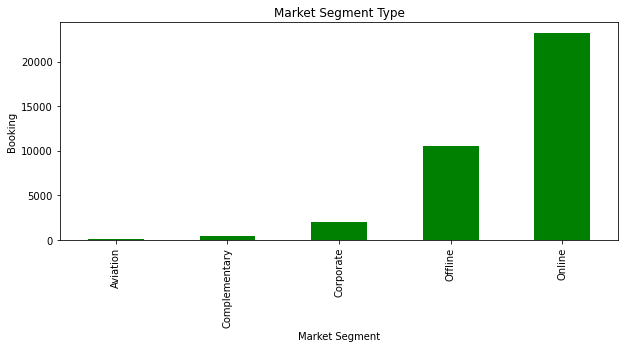

In [785]:
#Data visualization - Graph on Market Segment

MarketType = pd.DataFrame(df.groupby("market_segment_type")["market_segment_type"].count())
MarketType['market_segment_type'].plot(kind ='bar',stacked=True, figsize=(10,4), xlabel='Market Type',color=('green'))
plt.ylabel('Booking')
plt.xlabel('Market Segment')
plt.title('Market Segment Type')
plt.show()

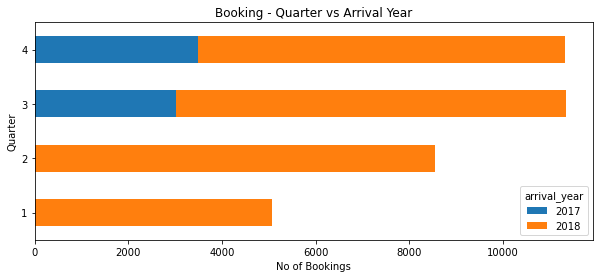

In [786]:
#Data visualization - Graph on Quarter vs Arrival Year

df.groupby(['Quarter', 'arrival_year']).size().unstack().plot(kind='barh',stacked=True, figsize=(10,4))
plt.ylabel('Quarter')
plt.xlabel('No of Bookings')
plt.title('Booking - Quarter vs Arrival Year')
plt.show()

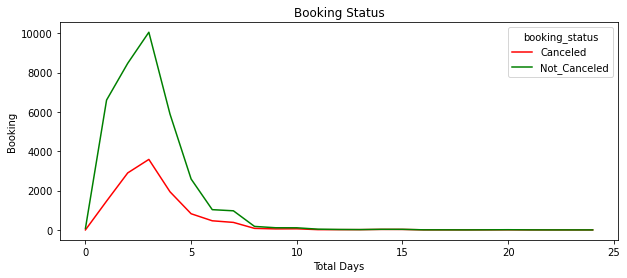

In [787]:
#Data visualization - Graph on Total days booked vs Booking Status

df.groupby(['TotalDays','booking_status']).size().unstack().plot(kind='line',stacked=True, figsize=(10,4),color=('red','green'))
plt.ylabel('Booking')
plt.xlabel('Total Days')
plt.title('Booking Status')
plt.show()

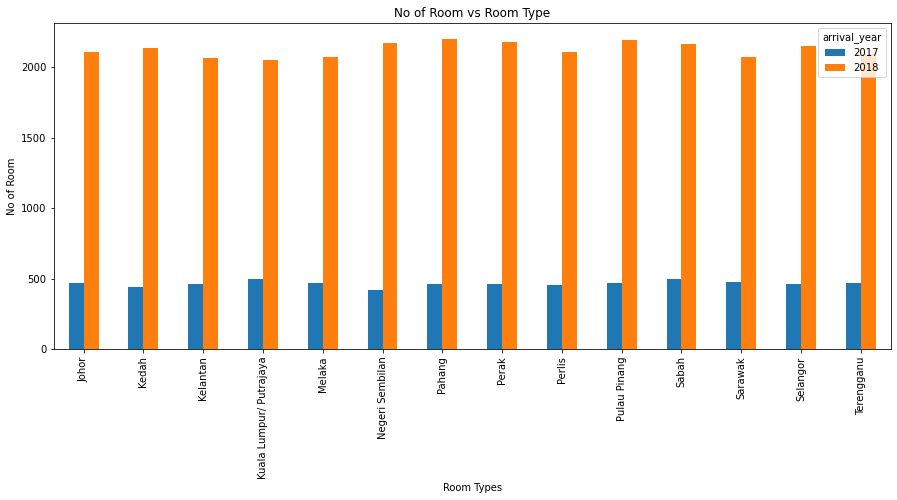

In [788]:
#Data visualization - Graph on Branch & Year - Bookings 

df.groupby(['Branch', 'arrival_year']).size().unstack().plot(kind='bar', figsize=(15,6))
plt.ylabel('No of Room')
plt.xlabel('Room Types')
plt.title('No of Room vs Room Type')
plt.show()

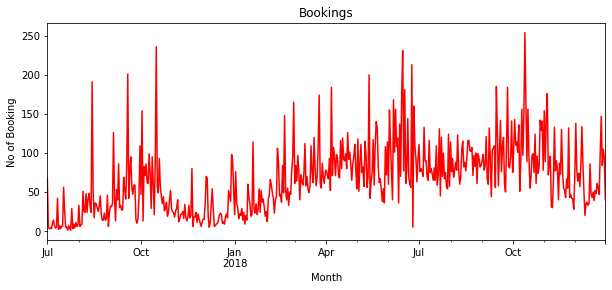

In [789]:
#Data visualization - Graph on booking per days


Arrival = pd.DataFrame(df.groupby("ArrivalDate")["ArrivalDate"].count())
Arrival['ArrivalDate'].plot(kind ='line', figsize=(10,4), xlabel='ArrivalDate', color='red')
plt.ylabel('No of Booking')
plt.xlabel('Month')
plt.title('Bookings')
plt.show()

In [790]:
#Data visualization - Convert meal plan data to percentage

MealPlan = pd.DataFrame(df.groupby("type_of_meal_plan")["type_of_meal_plan"].count())
MealPlan['Percentage']= (MealPlan["type_of_meal_plan"]/len(df))*100

In [791]:
#Data visualization - print meal plan 

MealPlan

,type_of_meal_plan,Percentage
type_of_meal_plan,,
Meal Plan 1,27835,76.733287
Meal Plan 2,3305,9.110958
Meal Plan 3,5,0.013784
Not Selected,5130,14.141971


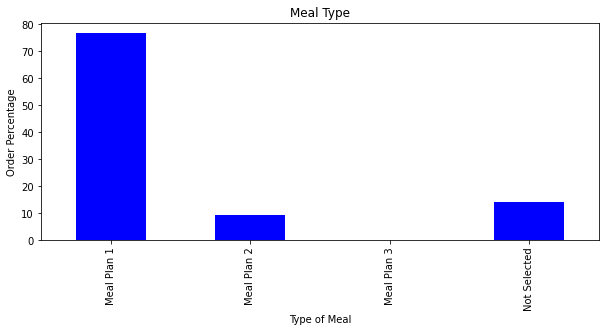

In [792]:
#Data visualization - Graph on Meal Plan percentage

MealPlan['Percentage'].plot(kind ='bar',figsize=(10,4),color="Blue")
plt.ylabel('Order Percentage')
plt.xlabel('Type of Meal')
plt.title('Meal Type')
plt.show()

In [ ]:
#Create a dataframe from selected field 

FrontDesk = (df[df['booking_status']== 'Not_Canceled'][['BookingDate','ArrivalDate','DepartureDate','Branch','TotalDays','type_of_meal_plan','Cost']])

In [794]:
#Create excel file & file name from user input 

import os

Excel_Ext = {".xlsx"}
extension = None
while extension not in Excel_Ext:  
    filename = input("Enter Excel file name you like to save: ").lower()
    extension = os.path.splitext(filename)[1]
FrontDesk.to_excel(filename, engine='xlsxwriter')
print('Saved successfull!!')

Enter Excel file name you like to save: yoges
Enter Excel file name you like to save: Test.xlsx
Saved successfull!!
